In [1]:
#libraries used throughout project
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers import Conv1D, MaxPooling1D, Input, Flatten
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt

In [2]:
#loading dataset
dga_domain_path=pd.read_csv('dga_data_copy.csv')
benign_domain_path=pd.read_csv('top-1m.csv')
#Getting values of datasets
dga_dataset_values=dga_domain_path['host'].tolist()
benign_dataset_values=benign_domain_path['host'].tolist()

In [3]:
#selecting a 1000 random values from the dga and benign dataset
dga_sample_dataset=np.random.choice(dga_dataset_values,1000,replace=False)
benign_sample_dataset=np.random.choice(benign_dataset_values,1000,replace=False)

In [4]:
#split the data into 80% train data and 20% test data
dga_train,dga_test= train_test_split(dga_sample_dataset,test_size=0.2)
benign_train,benign_test=train_test_split(benign_sample_dataset,test_size=0.2)

#Assigning 1's to dga data and 0's to benign data 
y_train_labels = np.hstack([np.zeros(len(benign_train)),np.ones(len(dga_train))])
y_test_labels = np.hstack([np.zeros(len(benign_test)),np.ones(len(dga_test))])

#Merging all training data together and all testing data together
train_ultimate=np.concatenate((dga_train,benign_train))
test_ultimate=np.concatenate((dga_test,benign_test))

In [5]:
#Tokenization of dataset
# splitting dataset into smaller units(characters)
#splitting characters using ','
# transforming all character to lower case
#Tokenizing data into individual characters
train_tok= Tokenizer(char_level=True,oov_token=True)
test_tok=Tokenizer(char_level=True, oov_token=True)

#Updates internal vocabulary based on a list of texts
#Creates a dictionary of valid characters
train_tok.fit_on_texts(train_ultimate)
test_tok.fit_on_texts(test_ultimate)

In [6]:
#Converts training and testing datasets into a sequence of integers
train_sequences=train_tok.texts_to_sequences(train_ultimate)
test_sequences=test_tok.texts_to_sequences(test_ultimate)

#example
#prints the first domain within the traing data
#print the first domain within the training datas sequence of integers
print(train_ultimate[0])
print(train_sequences[0])

1o8thx4waz9f812diokk75rqtk.org
[23, 3, 38, 11, 21, 27, 33, 18, 6, 32, 39, 20, 38, 23, 29, 15, 12, 3, 25, 25, 36, 35, 9, 30, 11, 25, 2, 3, 9, 17]


In [7]:
#Padding 
#Individuals elements in a dataset have different lengths
#input for deep learning model must be the one length
pad_train_dataset=pad_sequences(train_sequences,maxlen=320)
pad_test_dataset=pad_sequences(test_sequences,maxlen=320)

In [8]:
#Reshaping training and testing data
#This will enable the data to be fed easily into the Deep learning model
train_reshape=np.reshape(pad_train_dataset,(1600,320,1))
test_reshape=np.reshape(pad_test_dataset,(400,320,1))

#Reshaping training and testing labels 
#This will enable the data to be fed easily into the Deep learning model
y_train_labels_reshape=np.reshape(y_train_labels,(1600,1))
y_test_labels_reshape=np.reshape(y_test_labels,(400,1))

In [9]:
#build model
model=Sequential()

model.add(Convolution1D( 
                       filters=128,
                       kernel_size=3,
                       activation='relu',
                       ))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=["accuracy"])
model.build(input_shape=(1,320,1))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (1, 318, 128)             512       
                                                                 
 max_pooling1d (MaxPooling1D  (1, 159, 128)            0         
 )                                                               
                                                                 
 dropout (Dropout)           (1, 159, 128)             0         
                                                                 
 flatten (Flatten)           (1, 20352)                0         
                                                                 
 dense (Dense)               (1, 1)                    20353     
                                                                 
Total params: 20,865
Trainable params: 20,865
Non-trainable params: 0
____________________________________________________

In [12]:
history=model.fit(train_reshape,
                  y_train_labels_reshape,
                  validation_data=(test_reshape,y_test_labels),
                  batch_size=50, 
                  epochs=150)

Epoch 1/150
32/32 [==============================] - 1s 24ms/step - loss: 0.6693 - accuracy: 0.6062 - val_loss: 0.5849 - val_accuracy: 0.6700
Epoch 2/150
32/32 [==============================] - 1s 18ms/step - loss: 0.5719 - accuracy: 0.6844 - val_loss: 0.5644 - val_accuracy: 0.6750
Epoch 3/150
32/32 [==============================] - 1s 18ms/step - loss: 0.5291 - accuracy: 0.7131 - val_loss: 0.5478 - val_accuracy: 0.6775
Epoch 4/150
32/32 [==============================] - 1s 19ms/step - loss: 0.5118 - accuracy: 0.7300 - val_loss: 0.5310 - val_accuracy: 0.6975
Epoch 5/150
32/32 [==============================] - 1s 20ms/step - loss: 0.5152 - accuracy: 0.7275 - val_loss: 0.5261 - val_accuracy: 0.6925
Epoch 6/150
32/32 [==============================] - 1s 20ms/step - loss: 0.4926 - accuracy: 0.7481 - val_loss: 0.5240 - val_accuracy: 0.6925
Epoch 7/150
32/32 [==============================] - 1s 19ms/step - loss: 0.4873 - accuracy: 0.7325 - val_loss: 0.5373 - val_accuracy: 0.6825
Epoch 

32/32 [==============================] - 1s 33ms/step - loss: 0.3856 - accuracy: 0.8094 - val_loss: 0.4305 - val_accuracy: 0.7800
Epoch 52/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3942 - accuracy: 0.8150 - val_loss: 0.4634 - val_accuracy: 0.7600
Epoch 53/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3883 - accuracy: 0.8044 - val_loss: 0.4623 - val_accuracy: 0.7600
Epoch 54/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3866 - accuracy: 0.8081 - val_loss: 0.4313 - val_accuracy: 0.7650
Epoch 55/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3853 - accuracy: 0.8100 - val_loss: 0.4285 - val_accuracy: 0.7700
Epoch 56/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3854 - accuracy: 0.8138 - val_loss: 0.4418 - val_accuracy: 0.7650
Epoch 57/150
32/32 [==============================] - 1s 33ms/step - loss: 0.3837 - accuracy: 0.8050 - val_loss: 0.4256 - val_accuracy: 0.7825
Epoch 58/150

32/32 [==============================] - 1s 34ms/step - loss: 0.3643 - accuracy: 0.8194 - val_loss: 0.3911 - val_accuracy: 0.7950
Epoch 109/150
32/32 [==============================] - 1s 32ms/step - loss: 0.3529 - accuracy: 0.8225 - val_loss: 0.3910 - val_accuracy: 0.7925
Epoch 110/150
32/32 [==============================] - 1s 32ms/step - loss: 0.3551 - accuracy: 0.8269 - val_loss: 0.3931 - val_accuracy: 0.8000
Epoch 111/150
32/32 [==============================] - 1s 31ms/step - loss: 0.3672 - accuracy: 0.8150 - val_loss: 0.3975 - val_accuracy: 0.8025
Epoch 112/150
32/32 [==============================] - 1s 32ms/step - loss: 0.3557 - accuracy: 0.8275 - val_loss: 0.3918 - val_accuracy: 0.8125
Epoch 113/150
32/32 [==============================] - 1s 32ms/step - loss: 0.3481 - accuracy: 0.8394 - val_loss: 0.3946 - val_accuracy: 0.8025
Epoch 114/150
32/32 [==============================] - 1s 32ms/step - loss: 0.3448 - accuracy: 0.8306 - val_loss: 0.3882 - val_accuracy: 0.8175
Epoch 

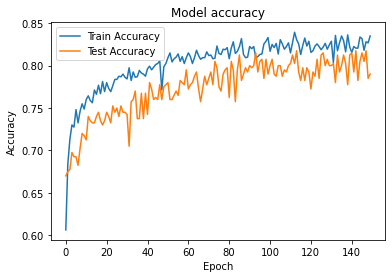

In [13]:
#plotting the accuracy of the training and testing data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy','Test Accuracy'], loc='upper left') 
plt.show() 

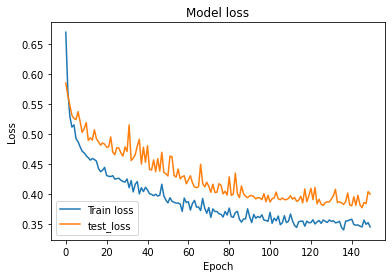

In [14]:
#plotting the loss of the training and testing data
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend(['Train loss','test_loss'], loc='lower left') 
plt.show() 